In [124]:
import pandas as pd
import numpy as np

import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.express as px

# Funcoes auxiliares
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# Modelo hierarquico
from scipy.cluster.hierarchy import dendrogram, linkage

# Modelos de Aprendizado Nao-Supervisionado
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score,rand_score,adjusted_rand_score

warnings.filterwarnings("ignore")

In [82]:
df = pd.read_csv('https://raw.githubusercontent.com/ImagineDogs/TranstornosMentais/main/dados/df_cid10.csv')
table = df[['cod_paciente','cid10_diagnostico', 'cid10_seg_diagnostico', 'cid10_faixa', 'cid10_faixa_alta', 'cid10_seg_faixa', 'cid10_seg_faixa_alta']].loc[~df['cid10_faixa'].isnull()]
table = table.fillna('Sem')

## Modelos para internações

In [83]:
encX = OneHotEncoder()

X = table[['cid10_diagnostico', 'cid10_seg_diagnostico']]
X = encX.fit_transform(X)
y1 = np.array(table['cid10_faixa_alta'])
y2 = np.array(table['cid10_seg_faixa_alta'])

In [84]:
dbscan = DBSCAN()

clusters = dbscan.fit_predict(X)

silhouette = silhouette_score(X, clusters)
rand = rand_score(y1, clusters)
adj_rand = adjusted_rand_score(y1, clusters)

# Imprimindo as métricas
print("Silhueta:", silhouette)
print("Índice Rand:", rand)
print("Rand Corrigido:", adj_rand)

Silhueta: 0.8930008834905617
Índice Rand: 0.7620371231750308
Rand Corrigido: 0.14868541255647683


In [85]:

dbscan = DBSCAN()

clusters = dbscan.fit_predict(X)

silhouette = silhouette_score(X, clusters)
rand = rand_score(y2, clusters)
adj_rand = adjusted_rand_score(y2, clusters)

# Imprimindo as métricas
print("Silhueta:", silhouette)
print("Índice Rand:", rand)
print("Rand Corrigido:", adj_rand)

Silhueta: 0.8930008834905617
Índice Rand: 0.5536266765921329
Rand Corrigido: 0.028472532877529922


In [86]:
n_clusters= 11

kmeans = KMeans(n_clusters=n_clusters)

# Ajuste o modelo K-Means aos dados X
clusters = kmeans.fit_predict(X)

# Calcule as métricas de avaliação
silhouette = silhouette_score(X, clusters)
rand = rand_score(y1, clusters)
adj_rand = adjusted_rand_score(y1, clusters)

# Imprima as métricas
print("Silhueta:", silhouette)
print("Índice Rand:", rand)
print("Rand Corrigido:", adj_rand)

Silhueta: 0.41263498170723134
Índice Rand: 0.7442007533959669
Rand Corrigido: 0.18648432327843942


In [87]:
n_clusters= 11

kmeans = KMeans(n_clusters=n_clusters)

# Ajuste o modelo K-Means aos dados X
clusters = kmeans.fit_predict(X)

# Calcule as métricas de avaliação
silhouette = silhouette_score(X, clusters)
rand = rand_score(y2, clusters)
adj_rand = adjusted_rand_score(y2, clusters)

# Imprima as métricas
print("Silhueta:", silhouette)
print("Índice Rand:", rand)
print("Rand Corrigido:", adj_rand)

Silhueta: 0.4147392759955356
Índice Rand: 0.547524374806245
Rand Corrigido: 0.027378313724524417


In [88]:
# cid_alta = df.filter(regex=r'^cid10_.*_alta$').columns.tolist()
# print(cid_alta)

# descricao_alta = df.filter(regex=r'^descricao_.*_alta$').columns.tolist()
# print(descricao_alta)

# alta = cid_alta + descricao_alta
# df_alta = df[alta]

## Modelos para pacientes


In [89]:
df_group = df[['cod_paciente','cid10_diagnostico','cid10_diagnostico_alta']]
df_group = df_group.groupby('cod_paciente').agg('first')
df_group = df_group.fillna('Sem')
df_group

,cid10_diagnostico,cid10_diagnostico_alta
cod_paciente,,
39,Sem,F20
40,F14,F14
41,Sem,F14
42,Sem,F19
43,F19,F19
...,...,...
11064,F19,F19
11065,F32,F33
11070,F32,F32


In [90]:
encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(df_group)

In [91]:
silhuetas = []

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(df_encoded)
    silhouette = silhouette_score(df_encoded, clusters)
    silhuetas.append(silhouette)

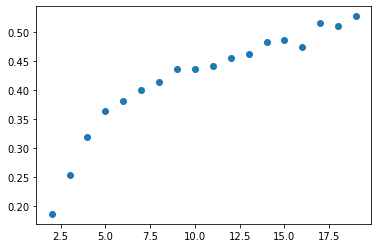

In [92]:
plt.scatter(range(2, 20), silhuetas)
plt.show()

In [93]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df_encoded)
silhouette = silhouette_score(df_encoded, clusters)
round(silhouette,2)

0.36

In [94]:
df_plot = df[['cod_paciente','cid10_faixa', 'cid10_faixa_alta']]
df_plot = df_plot.groupby('cod_paciente').agg('first')
df_plot = df_plot.fillna('Sem')
df_plot['grupo'] = clusters

In [95]:
df_plot

,cid10_faixa,cid10_faixa_alta,grupo
cod_paciente,,,
39,Sem,F20-F29,3
40,F10-F19,F10-F19,0
41,Sem,F10-F19,0
42,Sem,F10-F19,4
43,F10-F19,F10-F19,4
...,...,...,...
11064,F10-F19,F10-F19,4
11065,F30-F39,F30-F39,0
11070,F30-F39,F30-F39,0


In [165]:
df_counts = df_plot[['cid10_faixa','cid10_faixa_alta','grupo']].value_counts().reset_index().rename({0:'Contagem'},axis=1)
df_counts

,cid10_faixa,cid10_faixa_alta,grupo,Contagem
0,F10-F19,F10-F19,4,1050
1,F20-F29,F20-F29,3,643
2,F10-F19,F10-F19,2,447
3,F30-F39,F30-F39,1,407
4,F30-F39,F30-F39,0,386
...,...,...,...,...
147,F10-F19,Sem,4,1
148,F70-F79,Sem,0,1
149,F70-F79,F80-F89,0,1
150,F10-F19,F60-F69,2,1


In [179]:
fig = px.scatter(df_counts, x='cid10_faixa', y='cid10_faixa_alta', color='Contagem', symbol='grupo')
fig.update_traces(marker_size=10)
fig.update_layout(coloraxis=dict(cmax=400, cmin=0))
fig.update_layout(coloraxis_colorbar_x=-0.20)
fig.update_xaxes(categoryorder='category ascending')
fig.update_yaxes(categoryorder='category ascending')
fig.show()

In [137]:
fig = px.scatter(df_plot, x='cid10_faixa', y='cid10_faixa_alta',color='grupo')
fig.update_xaxes(categoryorder='category ascending')
fig.update_yaxes(categoryorder='category ascending')
fig.show()

## Agrupamento hierárquico

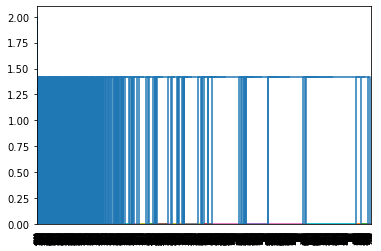

In [97]:
linkage_data = linkage(df_encoded.todense(), method='single', metric='euclidean')
dendrogram(linkage_data)

plt.show()

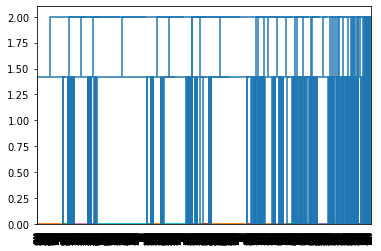

In [98]:
linkage_data = linkage(df_encoded.todense(), method='complete', metric='euclidean')
dendrogram(linkage_data)

plt.show()

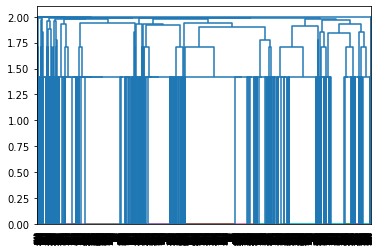

In [99]:
linkage_data = linkage(df_encoded.todense(), method='weighted', metric='euclidean')
dendrogram(linkage_data)

plt.show()

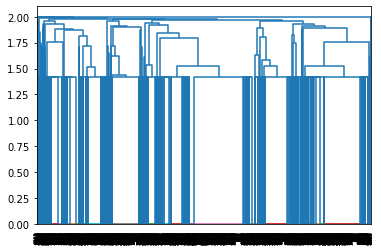

In [100]:
linkage_data = linkage(df_encoded.todense(), method='average', metric='euclidean')
dendrogram(linkage_data)

plt.show()

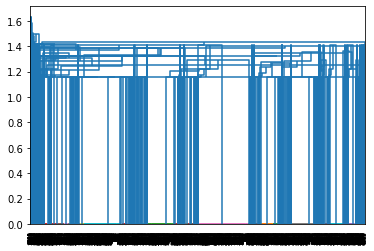

In [101]:
linkage_data = linkage(df_encoded.todense(), method='median', metric='euclidean')
dendrogram(linkage_data)

plt.show()

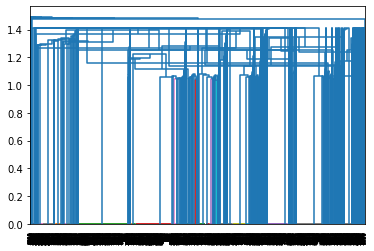

In [102]:
linkage_data = linkage(df_encoded.todense(), method='centroid', metric='euclidean')
dendrogram(linkage_data)

plt.show()

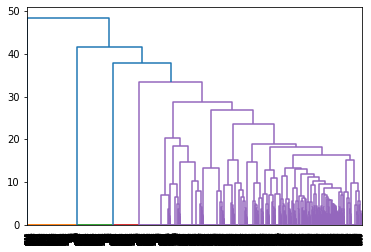

In [103]:
linkage_data = linkage(df_encoded.todense(), method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

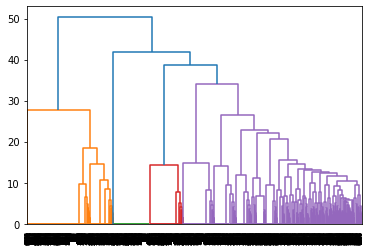

In [105]:
df_group = df[['cod_paciente','cid10_diagnostico','cid10_diagnostico_alta']]
df_group = df_group.groupby('cod_paciente').agg('last')
df_group = df_group.fillna('Sem')

encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(df_group)

linkage_data = linkage(df_encoded.todense(), method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()